In [49]:
import pandas as pd
from sklearn import tree
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
data = pd.read_csv('/home/varia/MEGA/BI/Mashine_learning/HeartDiseaseData.csv', index_col = [0])

In [9]:
data.head()

,ID,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num,Place
1,1,28,male,atypical angina,130.0,132.0,False,showing probable or definite left ventricular ...,185.0,no,0.0,0,Hungary
2,2,29,male,atypical angina,120.0,243.0,False,normal,160.0,no,0.0,0,Hungary
3,3,29,male,atypical angina,140.0,NaN,False,normal,170.0,no,0.0,0,Hungary
4,4,30,female,typical angina,170.0,237.0,False,having ST-T wave abnormality (T wave inversion...,170.0,no,0.0,0,Hungary
5,5,31,female,atypical angina,100.0,219.0,False,having ST-T wave abnormality (T wave inversion...,150.0,no,0.0,0,Hungary


In [10]:
data.describe()

,ID,Age,trestbps,chol,thalach,oldpeak,num
count,457.000000,457.000000,424.000000,431.000000,424.000000,421.000000,457.000000
mean,229.000000,50.962801,131.488208,200.048724,134.910377,0.622090,0.459519
std,132.068795,9.219588,18.829454,113.463794,24.251177,0.922115,0.498905
min,1.000000,28.000000,80.000000,0.000000,69.000000,-2.600000,0.000000
25%,115.000000,45.000000,120.000000,171.000000,118.000000,0.000000,0.000000
50%,229.000000,52.000000,130.000000,220.000000,135.000000,0.000000,0.000000
75%,343.000000,57.000000,140.000000,269.500000,150.000000,1.000000,1.000000
max,457.000000,75.000000,200.000000,603.000000,190.000000,5.000000,1.000000


In [18]:
data.dtypes

ID            int64
Age           int64
Sex          object
cp           object
trestbps    float64
chol        float64
fbs          object
restecg      object
thalach     float64
exang        object
oldpeak     float64
num           int64
Place        object
dtype: object

In [46]:
data.isnull().sum()

ID          0
Age         0
Sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     4
num         0
Place       0
dtype: int64

In [34]:
data.restecg.unique()

array(['showing probable or definite left ventricular hypertrophy by Estes criteria',
       'normal',
       'having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV',
       nan], dtype=object)

In [44]:
data.groupby('restecg').count()
data.groupby('exang').count()

,ID,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,oldpeak,num,Place
exang,,,,,,,,,,,,
no,270,270,270,270,270,270,270,270,270,268,270,270
yes,152,152,152,152,152,152,152,152,152,150,152,152


In [45]:
data=data.loc[~data['restecg'].isna()]
data=data.loc[~data['exang'].isna()]


In [47]:

for column in data:
    if data [str(column)].isnull().sum()!=0:
        median=data[str(column)].median()
        data [str(column)] = data[str(column)].fillna(median)
data.isnull().sum()

ID          0
Age         0
Sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
num         0
Place       0
dtype: int64

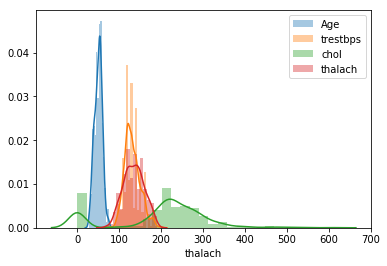

In [50]:
data_numeric = data.select_dtypes(include=['int', 'float'])
data_numeric = data_numeric.drop(['oldpeak', 'num', 'ID'], axis=1)
data_numeric.head()
for column in data_numeric:
    sns.distplot(data[str(column)], label = column)
plt.legend()

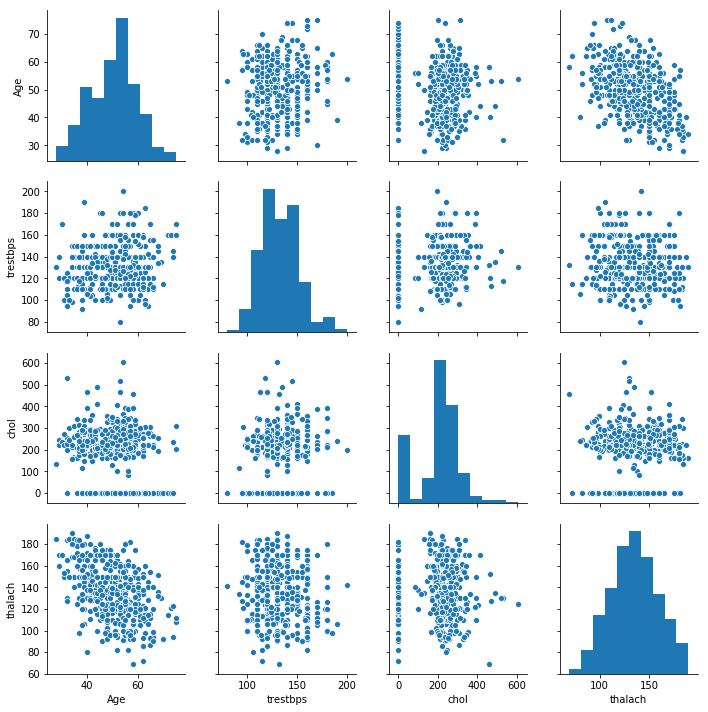

In [52]:
sns.pairplot(data_numeric)

In [53]:
data = pd.get_dummies(data)
data.head()

,ID,Age,trestbps,chol,thalach,oldpeak,num,Sex_female,Sex_male,cp_asymptomatic,...,fbs_False,fbs_True,restecg_having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV,restecg_normal,restecg_showing probable or definite left ventricular hypertrophy by Estes criteria,exang_no,exang_yes,Place_Hungary,Place_Switzerland,Place_VA
1,1,28,130.0,132.0,185.0,0.0,0,0,1,0,...,1,0,0,0,1,1,0,1,0,0
2,2,29,120.0,243.0,160.0,0.0,0,0,1,0,...,1,0,0,1,0,1,0,1,0,0
3,3,29,140.0,220.0,170.0,0.0,0,0,1,0,...,1,0,0,1,0,1,0,1,0,0
4,4,30,170.0,237.0,170.0,0.0,0,1,0,0,...,1,0,1,0,0,1,0,1,0,0
5,5,31,100.0,219.0,150.0,0.0,0,1,0,0,...,1,0,1,0,0,1,0,1,0,0


In [54]:
X = data.drop('num', axis=1)
y = data.num

In [55]:
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [57]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

In [58]:
from IPython.display import HTML
style = "<style>svg{width:10% !important;height:10% !important;}</style>"
HTML(style)

In [56]:
clf.score(X, y)

1.0

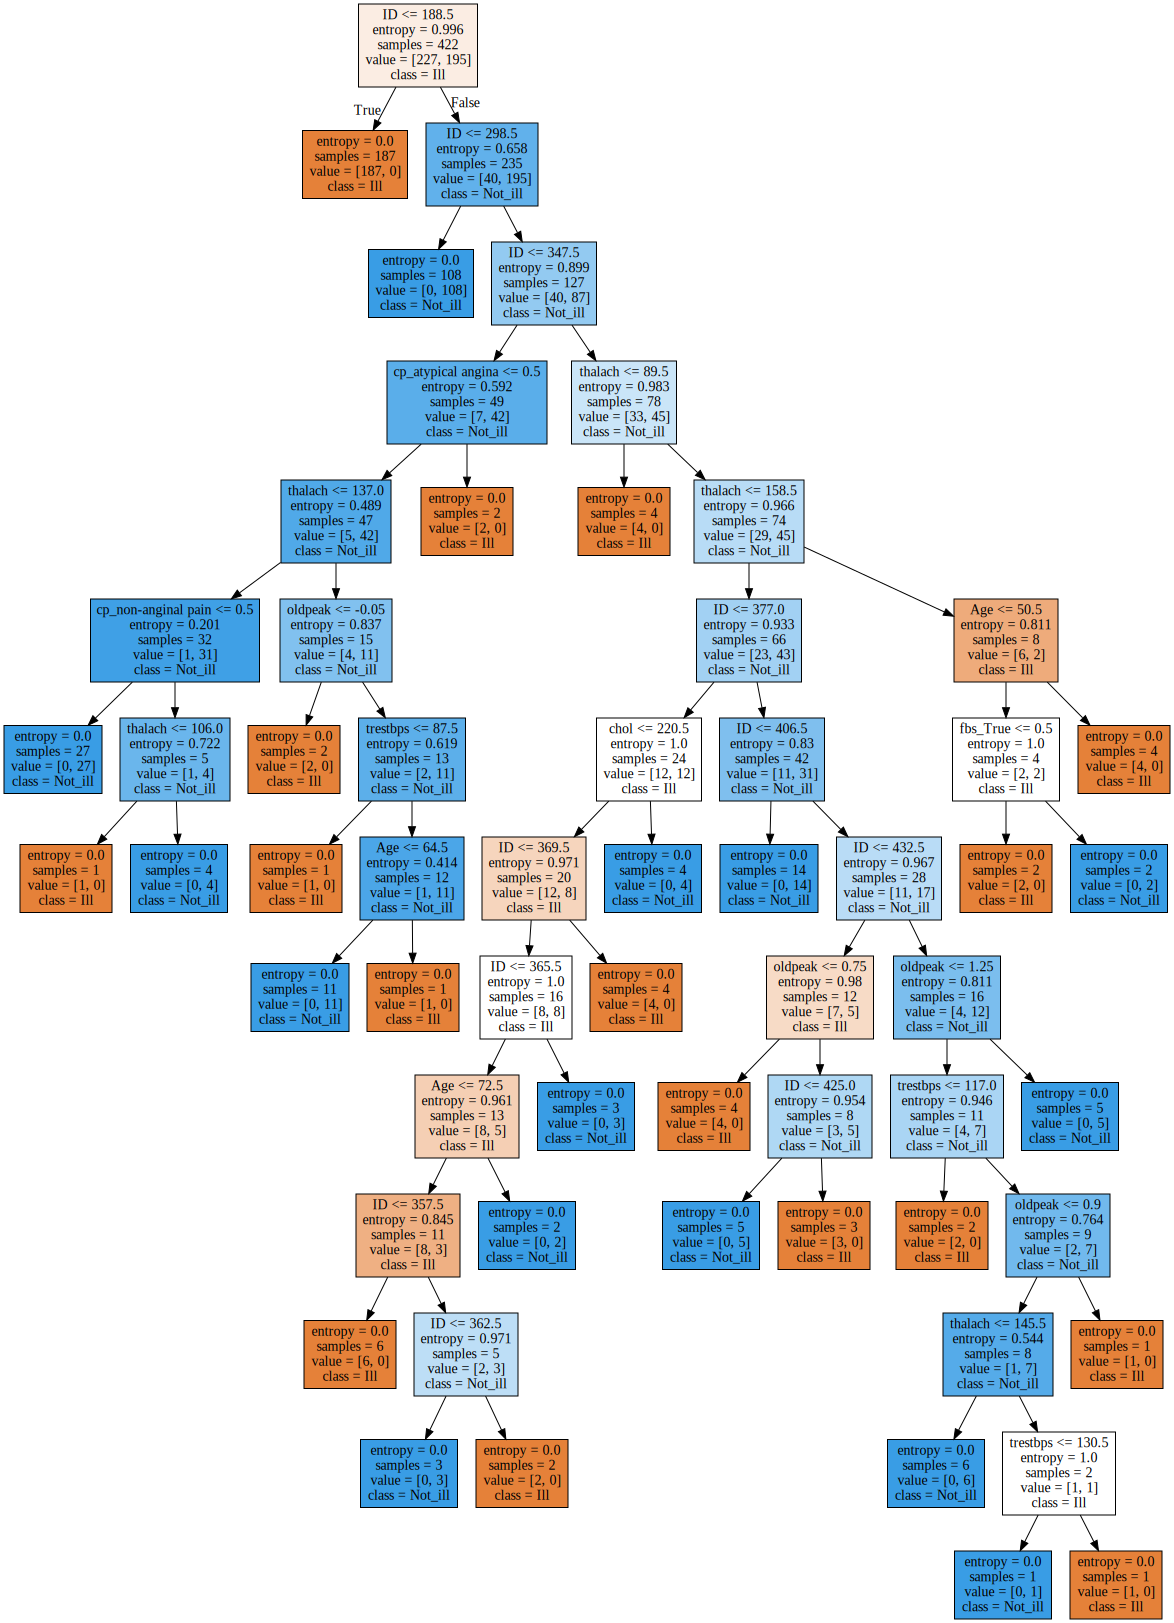

In [61]:
style = "<style>svg{width:10% !important;height:10% !important;}</style>"
HTML(style)
graph = Source(tree.export_graphviz(clf, out_file=None
   , feature_names=list(X), class_names=['Ill', 'Not_ill'] 
   , filled = True))

display(SVG(graph.pipe(format='svg')))

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [64]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [65]:
clf.score(X_train, y_train)

1.0

In [66]:
clf.score(X_test, y_test)

0.8428571428571429

In [67]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [68]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [69]:
clf.score(X_train, y_train)

0.9148936170212766

In [25]:
clf.score(X_test, y_test)

0.8203389830508474